In [43]:
%matplotlib inline
from datetime import date, datetime
import csv

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import streamlit as st

In [23]:
# Category
CATEGORY_DAY_PATH = 'data/dfc_day.csv'
# Transformer
TRANSFORMER_DAY_PATH = 'data/dfm_day.csv'
# Geographical
GEO_DTR_PATH = 'data/geo_dtr_1day_cons.csv'

In [28]:
CATEGORY_DF = pd.read_csv(CATEGORY_DAY_PATH).drop('Unnamed: 0', axis=1)
CATEGORY_DF.head()

,date,CATEGORY,conload,imp
0,2021-04-01,MSI,13920.0,196.56
1,2021-04-01,Residential,3840.0,60.50
2,2021-04-01,Water Works,NaN,389.06
3,2021-04-02,MSI,13920.0,190.08
4,2021-04-02,Residential,3840.0,55.32


In [30]:
CATEGORIES = CATEGORY_DF['CATEGORY'].unique()
CATEGORIES

array(['MSI', 'Residential', 'Water Works'], dtype=object)

In [33]:
CATEGORY_DATA = [
    CATEGORY_DF.loc[CATEGORY_DF['CATEGORY'] == c]
    for c in CATEGORIES   
]
CATEGORY_DATA

[            date CATEGORY  conload     imp
 0     2021-04-01      MSI  13920.0  196.56
 3     2021-04-02      MSI  13920.0  190.08
 6     2021-04-03      MSI  13920.0  199.48
 9     2021-04-04      MSI  13920.0  202.06
 12    2021-04-05      MSI  13920.0  210.68
 ...          ...      ...      ...     ...
 1080  2022-03-27      MSI   6960.0   88.41
 1083  2022-03-28      MSI   6960.0   92.00
 1086  2022-03-29      MSI   6960.0   92.13
 1089  2022-03-30      MSI   6960.0   92.81
 1092  2022-03-31      MSI   6960.0   89.77
 
 [365 rows x 4 columns],
             date     CATEGORY  conload    imp
 1     2021-04-01  Residential   3840.0  60.50
 4     2021-04-02  Residential   3840.0  55.32
 7     2021-04-03  Residential   3840.0  61.48
 10    2021-04-04  Residential   3840.0  72.14
 13    2021-04-05  Residential   3840.0  59.50
 ...          ...          ...      ...    ...
 1081  2022-03-27  Residential   1920.0  40.79
 1084  2022-03-28  Residential   1920.0  32.88
 1087  2022-03-29  Res

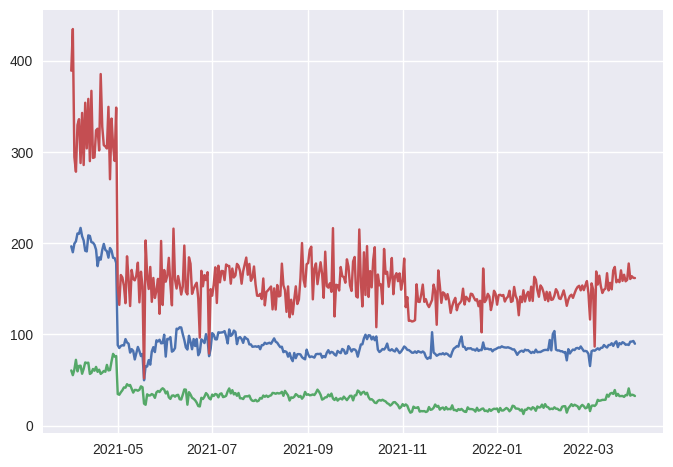

In [44]:
fig = plt.figure()
ax = plt.axes()

x = [datetime.strptime(d, '%Y-%m-%d').date() for d in CATEGORY_DATA[0].date]
ax.plot(x, CATEGORY_DATA[0].imp)
ax.plot(x, CATEGORY_DATA[1].imp)
ax.plot(x, CATEGORY_DATA[2].imp)

In [46]:
def load_transformer_energy_usage_data():
    # Transformer
    TRANSFORMER_DAY_PATH = 'data/dfm_day.csv'

    TRANSFORMER_DF = pd.read_csv(TRANSFORMER_DAY_PATH).drop('Unnamed: 0', axis=1)

    TRANSFORMERS = TRANSFORMER_DF['MTR_NUMBER'].unique()

    TRANSFORMER_DATA = [
        TRANSFORMER_DF.loc[TRANSFORMER_DF['MTR_NUMBER'] == t]
        for t in TRANSFORMERS  
    ]

    return TRANSFORMER_DATA, TRANSFORMERS

TRANSFORMER_DATA, TRANSFORMERS = load_transformer_energy_usage_data()

x = [datetime.strptime(d, '%Y-%m-%d').date() for d in TRANSFORMER_DATA[0].date]

In [48]:
print(TRANSFORMERS)
len(TRANSFORMER_DATA)

['USS 0004903' 'USS 0004927' 'USS 0004949' 'USS 0004966' 'USS 0005019'
 'USS 0008953' 'USS 0008983' 'USS 0009044' 'USS 0009063' 'USS 0009067'
 'USS 0009070' 'USS 0009072' 'USS 0009073' 'USS 0009074' 'USS 0009075'
 'USS 0009076' 'USS 0015695' 'USS 0017113' 'USS 0017137' 'USS 0017138'
 'USS 0020686' 'USS 0020707' 'UST 0000711' 'UST 0000712' 'UST 0000713'
 'UST 0002019' 'UST 0002020' 'UST 0002021']


28

In [53]:
print(TRANSFORMER_DATA[0].shape)
TRANSFORMER_DATA[0]

(365, 4)


,date,MTR_NUMBER,conload,imp
0,2021-04-01,USS 0004903,384.0,8.68
28,2021-04-02,USS 0004903,384.0,5.68
56,2021-04-03,USS 0004903,384.0,7.98
84,2021-04-04,USS 0004903,384.0,8.22
112,2021-04-05,USS 0004903,384.0,7.38
...,...,...,...,...
9903,2022-03-27,USS 0004903,192.0,5.71
9931,2022-03-28,USS 0004903,192.0,5.02
9959,2022-03-29,USS 0004903,192.0,5.33
9987,2022-03-30,USS 0004903,192.0,4.87


In [54]:
TRANSFORMER_DATA[0].imp

0        8.68
28       5.68
56       7.98
84       8.22
112      7.38
         ... 
9903     5.71
9931     5.02
9959     5.33
9987     4.87
10015    5.89
Name: imp, Length: 365, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (365,) and (302,)

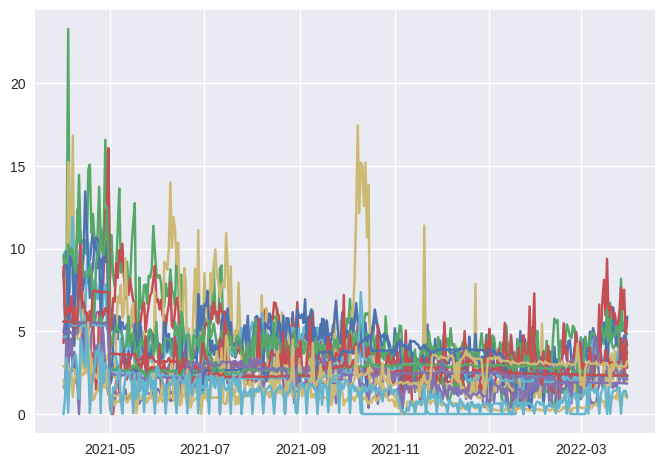

In [56]:
fig = plt.figure()
ax = plt.axes()


x = [datetime.strptime(d, '%Y-%m-%d').date() for d in TRANSFORMER_DATA[0].date]

for i in range(len(TRANSFORMERS)):
    ax.plot(x, TRANSFORMER_DATA[i].imp, label=TRANSFORMERS[i])

plt.legend(loc='upper right')

ax.set_ylabel('Energy Usage')
ax.set_xlabel('Date')
ax.set_title('Consumer Energy Usage by Transformer')


In [63]:
print(len(x))
print([len(TRANSFORMER_DATA[i].imp) for i in range(len(TRANSFORMERS))])

365
[365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 302, 365, 365, 360, 256, 365, 365, 365, 365, 365]
